<a href="https://colab.research.google.com/github/lsmith01t/PROJECT_2/blob/main/Project2v1.6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report


In [90]:
df_1 = pd.read_csv('adult.csv')
df_1_ml = df_1.copy()

In [134]:
def eval_classification(true, pred, name='Model'):
  """shows classification_report and confusion matrix
  for the model predictions"""
  
  print(name, '\n')
  print(classification_report(true, pred))
  ConfusionMatrixDisplay.from_predictions(true, pred)
  plt.show()

  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Precision'] = [precision_score(true, pred)]
  scores['Recall'] = [recall_score(true, pred)]
  scores['F1 Score'] = [f1_score(true, pred)]
  scores['Accuracy'] = [accuracy_score(true, pred)]

  return scores

#Data Set 1 Adult Income Dataset

## 1.This data was obtained from Kaggles website. 
The data source can be located here: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Acknowledgements:
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

##2.The target of my project will be to predict if the income of each person is in one of two classes. Greater than 50K or not.  
 

In [92]:
df_1_ml.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [93]:

df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [94]:
#This will allow me to identify if there are duplicate values in the data. I can see that there are 52
print(df_1_ml.duplicated().value_counts())


False    48790
True        52
dtype: int64


In [95]:
#look at the values of all objects to see if necessary to adjust. 
for o in df_1_ml.select_dtypes(object):
  print(df_1_ml[o].value_counts())
  print('\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

In [96]:
df_1_ml.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Upon review of the unique fields I see opportunities to drop columns that will not aid in the prediction of the class.

The best candidate to eliminate will be "fnlwgt', this factor does not add predictive value and substantially increases the feature complication. 

I also believe the captial gain and capital loss columns can be removed. 

It appears the education and educational num are associated with each other and therefore I can eliminate education for the the classification exercise. 

Age presents an opportunity to bin ages into 4 or 5 groups. 

In [97]:
df_1_ml['age'] = df_1_ml['age'].apply(lambda x: 'young' if x < 30 else 'distinguished')

In [98]:
df_1_ml['income'] = df_1_ml['income'].replace('<=50K', 0)
df_1_ml['income'] = df_1_ml['income'].replace('>50K', 1)

df_1_ml['income'].head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [99]:
df_1_ml.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'education'], inplace=True)
df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  object
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   hours-per-week   48842 non-null  int64 
 9   native-country   48842 non-null  object
 10  income           48842 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


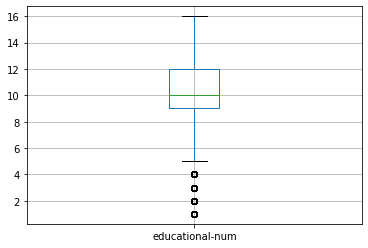

In [100]:
df_1_ml.boxplot(column = 'educational-num');


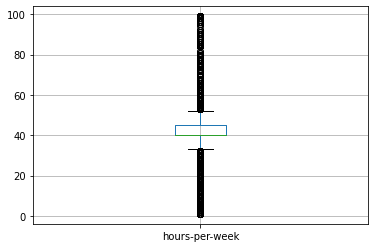

In [101]:
df_1_ml.boxplot(column = 'hours-per-week');

In [102]:
y = df_1_ml['income']
X = df_1_ml.drop(columns= 'income')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [141]:

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()
pca = PCA(n_components=2)
knn = KNeighborsClassifier()


num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

processor = make_column_transformer(num_tuple,cat_tuple)


knn_pipe = make_pipeline(processor, knn)
knn_pca_pipe = make_pipeline(processor, pca, knn)



In [104]:
%%time
knn_pipe.fit(X_train, y_train)


CPU times: user 133 ms, sys: 4.84 ms, total: 138 ms
Wall time: 141 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa07a49d90>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa07a49d10>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [142]:
%%time
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 585 ms, sys: 149 ms, total: 733 ms
Wall time: 443 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa0b1f3b10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa0b54bf10>)])),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [106]:
%%time
knn_pred_train = knn_pipe.predict(X_train)
knn_pred_test = knn_pipe.predict(X_test)

CPU times: user 56.6 s, sys: 3.26 s, total: 59.8 s
Wall time: 47.3 s


In [143]:
%%time
knn_pca_pred_train = knn_pca_pipe.predict(X_train)
knn_pca_pred_test = knn_pca_pipe.predict(X_test)


CPU times: user 1.59 s, sys: 245 ms, total: 1.83 s
Wall time: 1.58 s


KNN Train 

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     27801
           1       0.40      0.09      0.15      8830

    accuracy                           0.75     36631
   macro avg       0.58      0.52      0.50     36631
weighted avg       0.68      0.75      0.68     36631



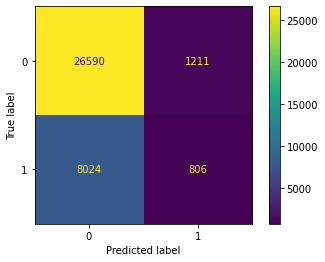

In [140]:
knn_train_scores = eval_classification(y_train, knn_pred_train, name='KNN Train')

KNN Test 

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      9354
           1       0.39      0.10      0.15      2857

    accuracy                           0.75     12211
   macro avg       0.58      0.52      0.50     12211
weighted avg       0.68      0.75      0.69     12211



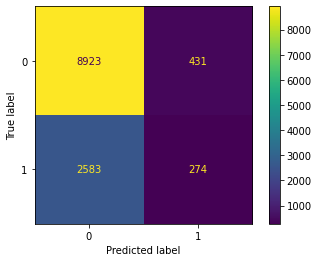

In [137]:
knn_test_scores = eval_classification(y_test, knn_pred_test, name = 'KNN Test')

KNN w-PCA Train 

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     27801
           1       0.70      0.57      0.63      8830

    accuracy                           0.84     36631
   macro avg       0.79      0.75      0.76     36631
weighted avg       0.83      0.84      0.83     36631



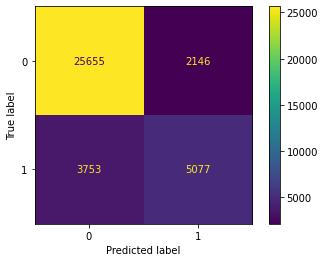

In [146]:
knn_pca_train_scores = eval_classification(y_train, knn_pca_pred_train, name='KNN w-PCA Train')

KNN w-PCA Test 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      9354
           1       0.62      0.51      0.56      2857

    accuracy                           0.81     12211
   macro avg       0.74      0.71      0.72     12211
weighted avg       0.80      0.81      0.81     12211



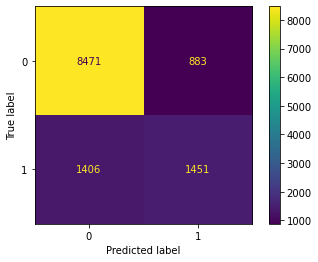

In [147]:
knn_pca_test_scores = eval_classification(y_test, knn_pca_pred_test, name = 'KNN w-PCA Test')

Upon review of the KNN Model before and after PCA it appears that PCA engineering can have an effect on the overall accuracy of the model. For test scores a 6% increase was observed. It is noted that precision, recall, and F1 were all down for class 0 but substantially up for class 1. The overall goal of the exercise was to predict which category the target would fall into and there is no known cost associated with Type 1 or Type 2 errors. Therefore PCA would be a useful process to add to the modeling outcome. 

In [150]:
neighbors = list(range(1,10))

df_scores = pd.DataFrame(index=neighbors, columns=['Test Score', 'Train Score'])

for n in neighbors:
  loop_knn = KNeighborsClassifier(n_neighbors=n)
  loop_pipe = make_pipeline(processor, loop_knn)
  loop_pipe.fit(X_train, y_train)
  train_score = loop_pipe.score(X_train, y_train)
  test_score = loop_pipe.score(X_test, y_test)
  df_scores.loc[n, 'Train Score'] = train_score
  df_scores.loc[n, 'Test Score'] = test_score

In [151]:
print(df_scores)

  Test Score Train Score
1   0.789534    0.879037
2   0.810089    0.844285
3   0.815167    0.857989
4   0.823028    0.850427
5   0.824339    0.850455
6    0.82524    0.846578
7   0.828597    0.848216
8     0.8313    0.847261
9   0.833838    0.847069


In [152]:
knn_ht = KNeighborsClassifier(n_neighbors=9)
knn_pca_pipe_ht = make_pipeline(processor, pca, knn_ht)


In [153]:
%%time
knn_pca_pipe_ht.fit(X_train, y_train)

CPU times: user 567 ms, sys: 208 ms, total: 775 ms
Wall time: 467 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa0b1f3b10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa0b54bf10>)])),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [154]:
%%time
knn_pca_pred__ht_train = knn_pca_pipe_ht.predict(X_train)
knn_pca_pred_ht_test = knn_pca_pipe_ht.predict(X_test)


CPU times: user 1.62 s, sys: 235 ms, total: 1.85 s
Wall time: 1.62 s


KNN w-PCA hyper-tuned Train 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     27801
           1       0.67      0.58      0.63      8830

    accuracy                           0.83     36631
   macro avg       0.77      0.75      0.76     36631
weighted avg       0.83      0.83      0.83     36631



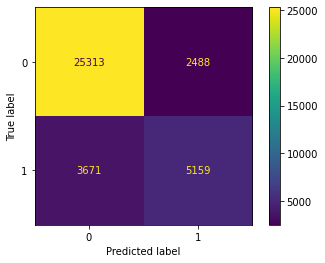

In [157]:
knn_pca__ht_train_scores = eval_classification(y_train, knn_pca_pred__ht_train, name='KNN w-PCA hyper-tuned Train')

KNN w-PCA and hyper-tuned Test 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9354
           1       0.62      0.54      0.58      2857

    accuracy                           0.82     12211
   macro avg       0.74      0.72      0.73     12211
weighted avg       0.81      0.82      0.81     12211



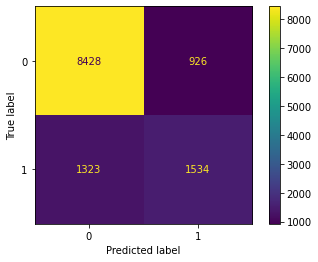

In [158]:
knn_pca__ht_test_scores = eval_classification(y_test, knn_pca_pred_ht_test, name = 'KNN w-PCA and hyper-tuned Test')

After hyper tunig the KNN model it was observed that the test accurace only increased by 1%. It is noteable that the training accurace actually decreased after hyper-tuning in the PCA version of the model. Despite the training output I would recommend to retain the hypertuning to further increase accuracy in the model. 

#Data Set 2 Credit Card Customer Prediction Dataset

##1. The data was downloaded from Kaggle. 

The data was found here: https://leaps.analyttica.com/home [Date Retrieved] from https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction

##2. The data is a collection of humans that are or were customers of a credit card company. 

##3. The target will be the "Atrrition_Flag" column. The objective will be to predict if customers will leave the company based on various features. 

##4. Each row represents one person in the study. 

##5. This is a classification problem. 

##6. The data has 23 features. 

##7. There are 10,127 rows. 

##8. The largest concern with the data is number of customers that churn. This is a small group of overall number and may not be a strong representation to predict attrition. 


In [109]:
#This will drop all the duplicate rows and then verify they have been dropped. 
df_1_ml.drop_duplicates(inplace=True)
print(df_1_ml.duplicated().value_counts())

False    25979
dtype: int64


In [110]:
df_2 = pd.read_csv('BankChurners.csv')
df_2_ml = df_2.copy()

In [111]:
df_2_ml.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [112]:
#can verify here if the data is missing values and if the data types are incorrect. Dropping the last two columns as these are calculations from someone elses work and I don't want them to skew the data. 
df_2_ml.info()
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [113]:
#verifying the columns were dropped. 
df_2_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [114]:
#Here I can search for duplicate values. I can see there are none.
print(df_2_ml.duplicated().value_counts())

False    10127
dtype: int64


In [115]:
#Here I can verify all the data values in the Objects columns are correct and there are no inconsistent values. 

print(df_2_ml['Attrition_Flag'].value_counts())
print(df_2_ml['Gender'].value_counts())
print(df_2_ml['Education_Level'].value_counts())
print(df_2_ml['Marital_Status'].value_counts())
print(df_2_ml['Income_Category'].value_counts())
print(df_2_ml['Card_Category'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


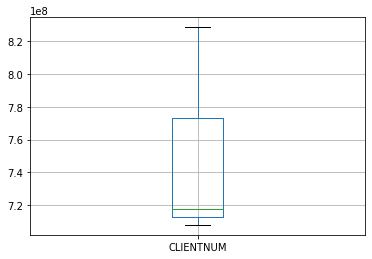

In [116]:
df_2_ml.boxplot(column = 'CLIENTNUM');

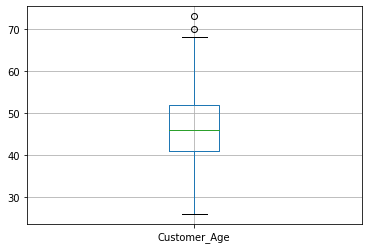

In [117]:
df_2_ml.boxplot(column = 'Customer_Age');

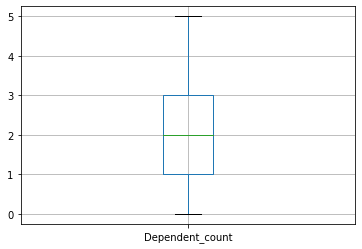

In [118]:
df_2_ml.boxplot(column = 'Dependent_count');

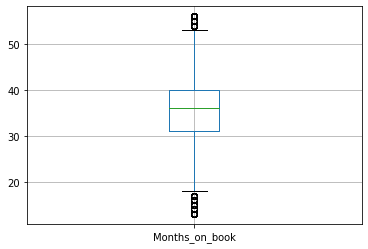

In [119]:
df_2_ml.boxplot(column = 'Months_on_book');

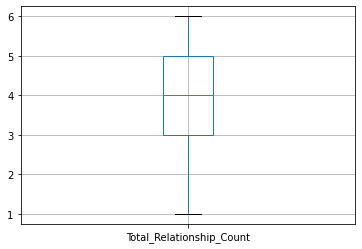

In [120]:
df_2_ml.boxplot(column = 'Total_Relationship_Count');

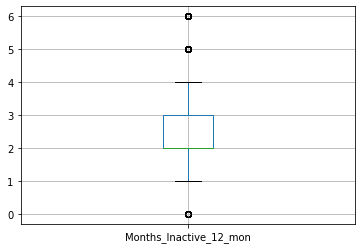

In [121]:
df_2_ml.boxplot(column = 'Months_Inactive_12_mon');

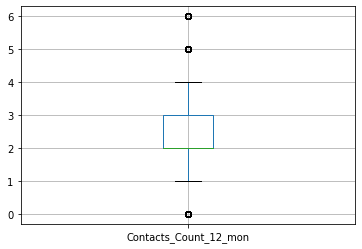

In [122]:
df_2_ml.boxplot(column = 'Contacts_Count_12_mon');

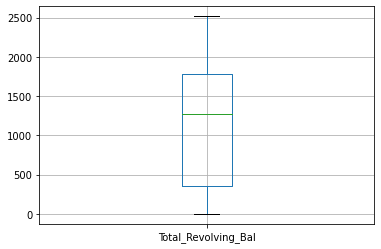

In [123]:
df_2_ml.boxplot(column = 'Total_Revolving_Bal');

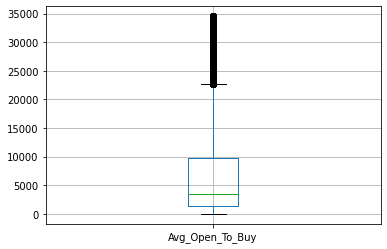

In [124]:
df_2_ml.boxplot(column = 'Avg_Open_To_Buy');

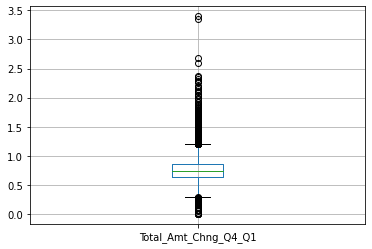

In [125]:
df_2_ml.boxplot(column = 'Total_Amt_Chng_Q4_Q1');

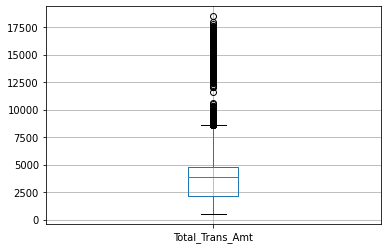

In [126]:
df_2_ml.boxplot(column = 'Total_Trans_Amt');

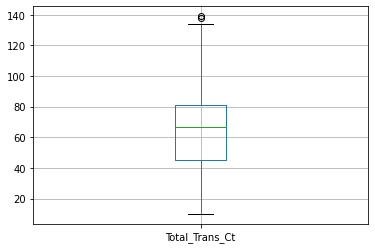

In [127]:
df_2_ml.boxplot(column = 'Total_Trans_Ct');

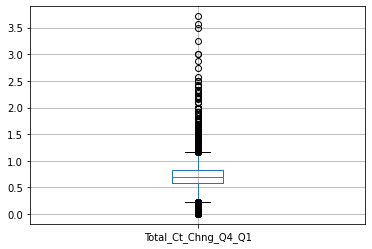

In [128]:
df_2_ml.boxplot(column = 'Total_Ct_Chng_Q4_Q1');

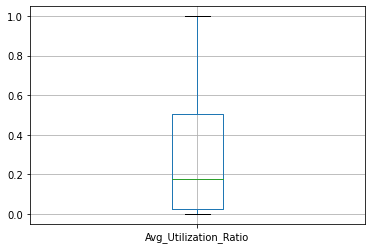

In [129]:
df_2_ml.boxplot(column = 'Avg_Utilization_Ratio');

In [130]:

cat_selector2 = make_column_selector(dtype_include='object')
num_selector2 = make_column_selector(dtype_include='number')


num_tuple2 = (scaler, num_selector2)
cat_tuple2 = (ohe, cat_selector2)

processor2 = make_column_transformer(num_tuple2,cat_tuple2)
processor.fit(df_2_ml)
array_processed2 = processor.transform(df_2_ml)
df_processed2 = pd.DataFrame(array_processed)
df_processed2.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-1.197259,-0.034087,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.419335,0.772930,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.747550,-0.034087,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.030373,-0.034087,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.030373,-0.841104,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


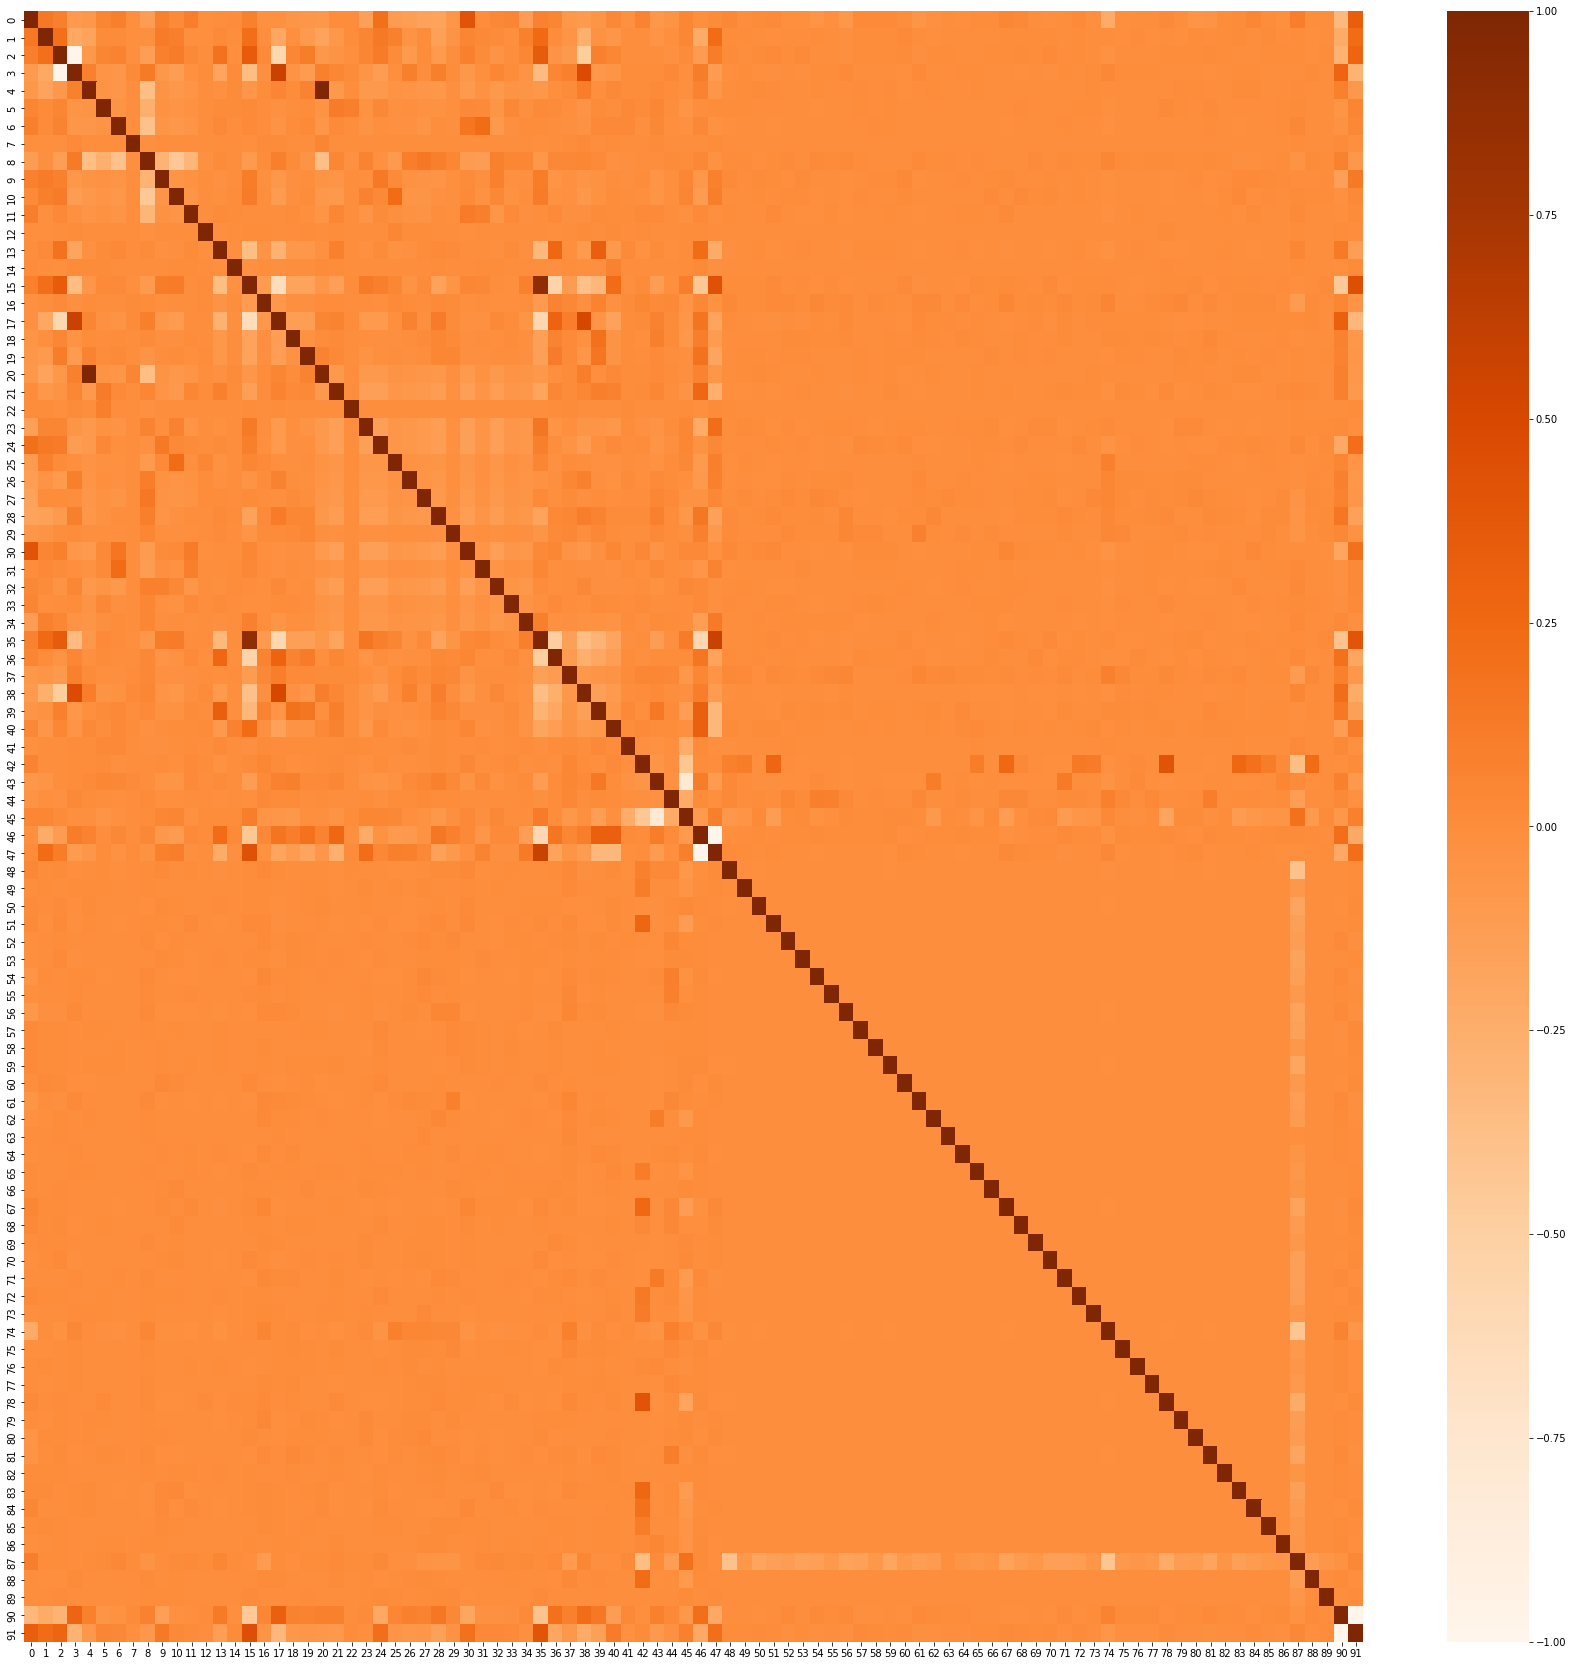

In [131]:
corr_2_ml = df_processed2.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_2_ml, cmap = "Oranges");

Upon review of the heat map you can clearly see that there are some data points where a high correlation was found. More code need to be written to lable the x and y axis data points so I can identify what these are in my data set. I will have to inquiry how to do this in code review as TA's are off today. 